In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas
%run 01_Credentials.ipynb
import os 

In [2]:
# Snowflake connection parameters
conn = snowflake.connector.connect(
    user='MEldeeb',
    password= os.environ.get('snowflake_pass'),
    account='VMFPMHB-OR45087', 
    warehouse='COMPUTE_WH',
    database='GH_DWH',
    schema='PUBLIC'
)
cur = conn.cursor()

In [5]:
temp_readings_for_all_GHs  =  """
    select 
        cast(d.timestamp as date) as date,
        f.sensor_id,
        f.location_id,
        avg(f.value) as avg_reading
    from fact_measurements f
    join dim_date d on d.timestamp = f.timestamp
    where d.month = 6
    group by date,f.sensor_id,f.location_id
    having f.sensor_id like 'T%'
    order by date,f.sensor_id;
    """
temp_readings_df = pd.read_sql(temp_readings_for_all_GHs,conn)
temp_readings_df.head(10)

,DATE,SENSOR_ID,LOCATION_ID,AVG_READING
0,2025-06-10,T_1,GH_1,30.374545
1,2025-06-10,T_2,GH_2,32.408333
2,2025-06-10,T_3,GH_3,32.802500
3,2025-06-11,T_1,GH_1,32.555000
4,2025-06-11,T_2,GH_2,29.657143
5,2025-06-11,T_3,GH_3,30.036667
6,2025-06-13,T_1,GH_1,32.690667
7,2025-06-13,T_2,GH_2,34.475000
8,2025-06-13,T_3,GH_3,31.053333
9,2025-06-14,T_1,GH_1,38.090000


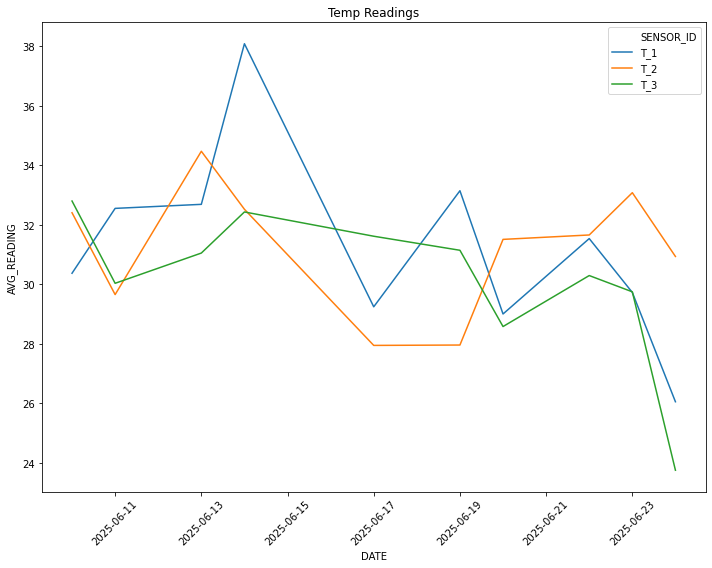

In [6]:
fig_1 , ax_1 = plt.subplots(figsize = (10,8))
sns.lineplot(x='DATE' , y='AVG_READING' ,data=temp_readings_df , hue='SENSOR_ID' , ax=ax_1)
plt.xticks(rotation=45)
plt.title("Temp Readings")
plt.tight_layout()
plt.show()

In [7]:
soil_moisture_readings_for_all_GHs = """
     select 
        cast(d.timestamp as date) as date,
        f.sensor_id,
        f.location_id,
        avg(f.value) as avg_reading
    from fact_measurements f
    join dim_date d on d.timestamp = f.timestamp
    where d.month = 6
    group by date,f.sensor_id,f.location_id
    having f.sensor_id like 'SM_%'
    order by date,f.sensor_id;
    """
soil_moisture_df = pd.read_sql(soil_moisture_readings_for_all_GHs,conn)
soil_moisture_df

,DATE,SENSOR_ID,LOCATION_ID,AVG_READING
0,2025-06-10,SM_1,GH_1,58.677778
1,2025-06-10,SM_2,GH_2,61.555556
2,2025-06-10,SM_3,GH_3,70.066667
3,2025-06-11,SM_1,GH_1,67.214286
4,2025-06-11,SM_2,GH_2,44.120000
5,2025-06-11,SM_3,GH_3,60.385714
6,2025-06-13,SM_1,GH_1,52.975000
7,2025-06-13,SM_2,GH_2,53.485714
8,2025-06-13,SM_3,GH_3,63.755556
9,2025-06-14,SM_1,GH_1,42.900000


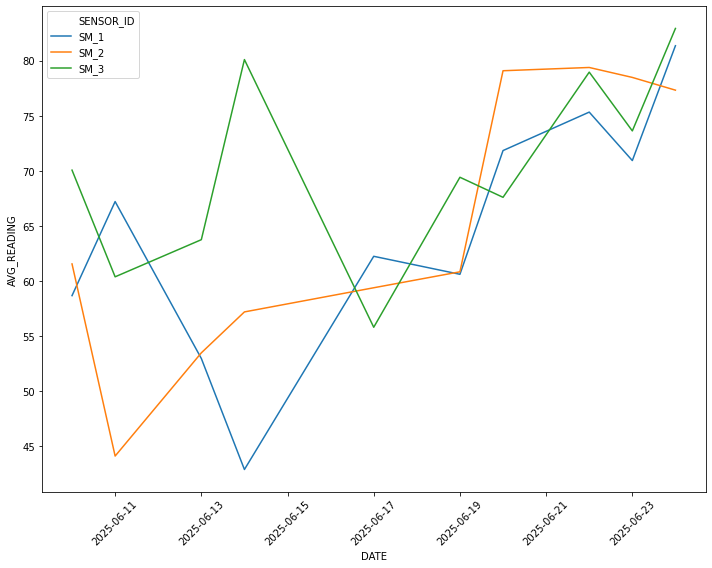

In [8]:
fig_1 , ax_1 = plt.subplots(figsize = (10,8))
sns.lineplot(x='DATE' , y='AVG_READING' ,data=soil_moisture_df , hue='SENSOR_ID' , ax=ax_1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()